In [5]:
!pip install --upgrade pixiedust

Requirement already up-to-date: pixiedust in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa0d-218294071c3031-cf228a6161b9/.local/lib/python3.5/site-packages
Requirement already up-to-date: astunparse in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa0d-218294071c3031-cf228a6161b9/.local/lib/python3.5/site-packages (from pixiedust)
Requirement already up-to-date: mpld3 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa0d-218294071c3031-cf228a6161b9/.local/lib/python3.5/site-packages (from pixiedust)
Requirement already up-to-date: lxml in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa0d-218294071c3031-cf228a6161b9/.local/lib/python3.5/site-packages (from pixiedust)
Requirement already up-to-date: geojson in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa0d-218294071c3031-cf228a6161b9/.local/lib/python3.5/site-packages (from pixiedust)
Requirement already up-to-date: markdown in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa0d-218294071c3031-cf228a6161b9/.local/lib/python3.5/sit

In [6]:
import pixiedust

In [3]:
accidents = pixiedust.sampleData("https://data.sfgov.org/api/views/vv57-2fgy/rows.csv?accessType=DOWNLOAD")

Downloaded 237974 bytes
Creating pySpark DataFrame for 'https://data.sfgov.org/api/views/vv57-2fgy/rows.csv?accessType=DOWNLOAD'. Please wait...
Loading file using 'SparkSession'
Successfully created pySpark DataFrame for 'https://data.sfgov.org/api/views/vv57-2fgy/rows.csv?accessType=DOWNLOAD'



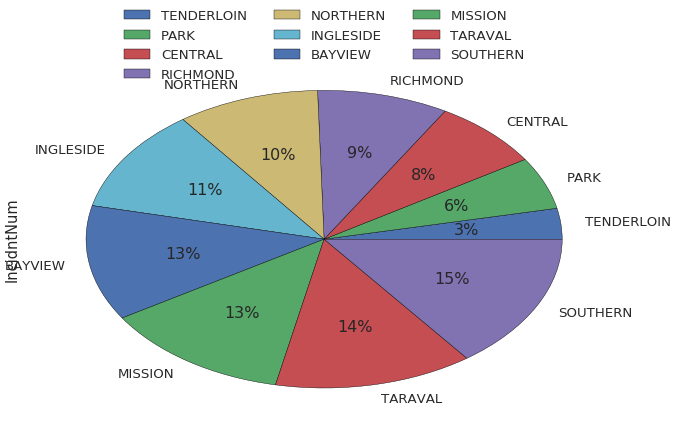

In [4]:
display(accidents)

In [7]:
display(accidents)

In [8]:
display(accidents)

In [9]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

# Get the hour value of a time string
# e.g. getHour("05:30") = 5
def getHour(s):
    return int(s.split(':')[0])

hr_udf = udf(getHour,IntegerType()) # User defined funciton return type integer

# Rename weekdays to enable mini time-series analysis
accidents = accidents.na.replace\
    (['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],\
    ['1-Mon','2-Tues','3-Wed','4-Thur','5-Fri','6-Sat','7-Sun'],\
    'DayOfWeek')
#  DataFrameNaFunctions

# Add Hour column and refine outcomes from traffic accidents
accidents = accidents.withColumn("Hour",hr_udf(accidents['Time']))\
    .withColumn("Res",\
    udf(lambda x: 'Arrest' if 'ARREST' in x else 'No Resolution' if x == 'NONE' else 'Other',StringType())\
    (accidents['Resolution']))

In [10]:
display(accidents)

In [11]:
display(accidents)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour,Res
160972789,NON-CRIMINAL,TRAFFIC ACCIDENT,3-Wed,12/21/2016,16:00,NORTHERN,"ARREST, BOOKED",OAK ST / WEBSTER ST,-122.42917887616841,37.774182253014295,"(37.774182253014295, -122.42917887616841)",16097278968050,16,Arrest
160965803,NON-CRIMINAL,TRAFFIC ACCIDENT,7-Sun,11/27/2016,18:46,NORTHERN,"ARREST, BOOKED",1500 Block of BROADWAY ST,-122.42259548253497,37.7957850208314,"(37.7957850208314, -122.42259548253497)",16096580368050,18,Arrest
160960756,NON-CRIMINAL,TRAFFIC ACCIDENT,5-Fri,11/25/2016,22:51,INGLESIDE,"ARREST, BOOKED",AVALON AV / VIENNA ST,-122.42691363033215,37.72515084970151,"(37.72515084970151, -122.42691363033215)",16096075668050,22,Arrest
160956012,NON-CRIMINAL,TRAFFIC ACCIDENT,3-Wed,11/23/2016,21:10,CENTRAL,"ARREST, BOOKED",CALIFORNIA ST / DAVIS ST,-122.39761329697711,37.79350810139195,"(37.79350810139195, -122.39761329697711)",16095601268050,21,Arrest
160954602,NON-CRIMINAL,TRAFFIC ACCIDENT,2-Tues,11/22/2016,13:00,BAYVIEW,NONE,3RD ST / CUSTER AV,-122.38737544865896,37.744261184696725,"(37.744261184696725, -122.38737544865896)",16095460268050,13,No Resolution
160954276,NON-CRIMINAL,TRAFFIC ACCIDENT,6-Sat,11/26/2016,14:30,SOUTHERN,"ARREST, BOOKED",7TH ST / HOWARD ST,-122.40939157489296,37.77797650379991,"(37.77797650379991, -122.40939157489296)",16095427668050,14,Arrest
160952305,NON-CRIMINAL,TRAFFIC ACCIDENT,1-Mon,12/05/2016,10:00,SOUTHERN,NONE,3RD ST / HARRISON ST,-122.39738878482612,37.78255434524264,"(37.78255434524264, -122.39738878482612)",16095230568050,10,No Resolution
160950462,NON-CRIMINAL,TRAFFIC ACCIDENT,2-Tues,11/22/2016,06:53,CENTRAL,NONE,BEACH ST / STOCKTON ST,-122.41069067585426,37.807891190622584,"(37.807891190622584, -122.41069067585426)",16095046268050,6,No Resolution
160916470,NON-CRIMINAL,TRAFFIC ACCIDENT,4-Thur,11/10/2016,15:43,INGLESIDE,"ARREST, BOOKED",CIRCULAR AV / JUDSON AV,-122.44427646378203,37.728260804883355,"(37.728260804883355, -122.44427646378203)",16091647068050,15,Arrest
160911646,NON-CRIMINAL,TRAFFIC ACCIDENT,2-Tues,11/08/2016,20:05,SOUTHERN,NONE,FOLSOM ST / ESSEX ST,-122.39564860066713,37.7863785494975,"(37.7863785494975, -122.39564860066713)",16091164668050,20,No Resolution
